# Credit card default detection

We are giving you a dataset and asking you to create a model to make predictions.
This assignment is less structured than the previous ones.  It is intended to be similar to what a potential
employer would give you to evaluate your skills.

So: time to show off ! Use the knowledge you have acquired in the first 7 weeks of the course to create a Jupyter notebook that presents your work (and you) in the best light.

As usual, a "correct answer" (e.g., highly predictive model) is only part of the goal.
Your entire research methodology should be evident, as per the "Recipe for ML" we have discussed in class.


# The problem

You are given a dataset of customers who have applied for credit.
Each customer is associated with some number of attributes, and a rating of being a Good/Bad credit risk.

## The dataset

- The dataset is given in the file "credit_data.csv".
- Each row corresponds to one customer.
- There are 20 attributes, some numeric and some categorical.
- The last column "Credit Risk" encodes whether the customer was judged to be a Good/Bad credit risk
    - 1: Good credit risk
    - 2: Bad credit risk

You will use this data to come up with a model that predicts "Credit Risk" for a customer from the customer's attributes.

### Attributes

A description of the attributes is given in the plain text file "credit_data_attributes.txt".

You will notice that the values for many attributes are encoded as strings.
For example, attribute 7 is the customer's Employment Status, having possible values
A71, A72, .., A75.  Per the file, "A71" means the customer is unemployed.

#### Currency

The currency units are "DM" (old German currency: the Deutsche Mark).

As you might guess: this data is not recent; you may find anachronisms other than the currency.

# Your submission

There are some ground rules, mainly to make grading easier for the GA and instructor.

Your `sklearn` model should be stored in the variable `credit_model`; this will allow the GA to apply `sklearn` methods to this variable to evaluate your predictions, e.g.
>`credit_model.predict( ... )`

Your submission must contain a Jupyter notebook in a file named
>LastName_FirstName_MidTerm_Project.ipynb

where `LastName` and `FirstName` should be replaced with your name (as it appears on the class roster).

**IF** your submission consists of files in addition to this one notebook, you can submit a *single* zip file.  This file **must** conform to the following rules:
- The notebook must execute, unchanged, when unzipped into *an arbitrary directory*
    - This means that all paths, e.g., to data files or modules, must be *relative* and not absolute.
    

# <font color="#0000dd"> ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font><br/>   


In [1]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# <font color="#0000dd"> Introduction </font><br/>   

###  Project Description:   
   - We are given a dataset of customers who have applied for credit. Each customer is associated with some number of attributes, and a rating of being a Good/Bad credit risk. We need to predict the Good/Bad credit risk based on given attributes.  

###  Contents:  
   - Get the data and have first look :  data overview, find missing data, split categorical and numeric feautures
   - Train test set spliting:  train set (train the algorithm); test set (use trained algorithms to predict outcomes)
   - Visualization and Feature Relations :  finding feature distributions, relations between different features, relations between features and target
   - Feature engineering :  finding relations between different features, reduce feature correlation, feature selection based on feature importance
   - Modeling the Data :  
       - Logistic Regression
       - Support Vector Machines
       - Decision Tree Classifier 
       - Random Forest Classifier
       - Extra Tree Classifier
       - Ensemble Methods:
           - XGBClassifier
           - AdaBoost Classifier
           - Bagging Classifier
           - Stacking Classifier
   - Conclusion : comparation of different models and further improvement


## <font color="#0000dd"> Get the data and have a first look </font>

### Getting the Data

In [2]:
data = pd.read_csv("./data/credit_data.csv")
data.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 12,Attribute 13,Attribute 14,Attribute 15,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## <font color="#0000dd">Train test set spliting </font>

- Split data into training and test set with 0.8:0.2.
- Using shuffle to reduce variance and make sure that models remain general and overfit less.

In [3]:
from sklearn.model_selection import train_test_split
X=data.drop(['Credit Risk'],axis=1)
y=data["Credit Risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [4]:
traindata=pd.concat([X_train, pd.DataFrame(y_train)],axis=1)
traindata.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 12,Attribute 13,Attribute 14,Attribute 15,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20,Credit Risk
940,A14,12,A32,A40,3527,A65,A72,2,A93,A101,...,A122,45,A143,A152,1,A174,2,A192,A201,1
862,A11,24,A32,A43,2439,A61,A72,4,A92,A101,...,A121,35,A143,A152,1,A173,1,A192,A201,2
934,A11,12,A32,A43,1498,A61,A73,4,A92,A101,...,A123,23,A141,A152,1,A173,1,A191,A201,1
557,A14,21,A30,A40,5003,A65,A73,1,A92,A101,...,A122,29,A141,A152,2,A173,1,A192,A201,2
970,A12,15,A32,A45,1514,A62,A73,4,A93,A103,...,A121,22,A143,A152,1,A173,1,A191,A201,1


In [5]:
y_train=traindata['Credit Risk']
X_train=traindata.drop(['Credit Risk'],axis=1)

In [6]:
X_train.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,Attribute 11,Attribute 12,Attribute 13,Attribute 14,Attribute 15,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20
940,A14,12,A32,A40,3527,A65,A72,2,A93,A101,3,A122,45,A143,A152,1,A174,2,A192,A201
862,A11,24,A32,A43,2439,A61,A72,4,A92,A101,4,A121,35,A143,A152,1,A173,1,A192,A201
934,A11,12,A32,A43,1498,A61,A73,4,A92,A101,1,A123,23,A141,A152,1,A173,1,A191,A201
557,A14,21,A30,A40,5003,A65,A73,1,A92,A101,4,A122,29,A141,A152,2,A173,1,A192,A201
970,A12,15,A32,A45,1514,A62,A73,4,A93,A103,2,A121,22,A143,A152,1,A173,1,A191,A201


## <font color="#0000dd">Discover and Visualize Data to gain insights </font>

- Find categorical and numeric feautures
- No missing data, so we don't need to fill in.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Attribute 1     1000 non-null object
Attribute 2     1000 non-null int64
Attribute 3     1000 non-null object
Attribute 4     1000 non-null object
Attribute 5     1000 non-null int64
Attribute 6     1000 non-null object
Attribute 7     1000 non-null object
Attribute 8     1000 non-null int64
Attribute 9     1000 non-null object
Attribute 10    1000 non-null object
Attribute 11    1000 non-null int64
Attribute 12    1000 non-null object
Attribute 13    1000 non-null int64
Attribute 14    1000 non-null object
Attribute 15    1000 non-null object
Attribute 16    1000 non-null int64
Attribute 17    1000 non-null object
Attribute 18    1000 non-null int64
Attribute 19    1000 non-null object
Attribute 20    1000 non-null object
Credit Risk     1000 non-null int64
dtypes: int64(8), object(13)
memory usage: 164.1+ KB


In [8]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 940 to 570
Data columns (total 21 columns):
Attribute 1     800 non-null object
Attribute 2     800 non-null int64
Attribute 3     800 non-null object
Attribute 4     800 non-null object
Attribute 5     800 non-null int64
Attribute 6     800 non-null object
Attribute 7     800 non-null object
Attribute 8     800 non-null int64
Attribute 9     800 non-null object
Attribute 10    800 non-null object
Attribute 11    800 non-null int64
Attribute 12    800 non-null object
Attribute 13    800 non-null int64
Attribute 14    800 non-null object
Attribute 15    800 non-null object
Attribute 16    800 non-null int64
Attribute 17    800 non-null object
Attribute 18    800 non-null int64
Attribute 19    800 non-null object
Attribute 20    800 non-null object
Credit Risk     800 non-null int64
dtypes: int64(8), object(13)
memory usage: 137.5+ KB


In [9]:
data.describe()

,Attribute 2,Attribute 5,Attribute 8,Attribute 11,Attribute 13,Attribute 16,Attribute 18,Credit Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [10]:
traindata.describe()

,Attribute 2,Attribute 5,Attribute 8,Attribute 11,Attribute 13,Attribute 16,Attribute 18,Credit Risk
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000
mean,20.933750,3241.060000,2.993750,2.84625,35.583750,1.398750,1.151250,1.305000
std,12.026332,2793.731048,1.109166,1.10301,11.573263,0.585386,0.358517,0.460695
min,4.000000,250.000000,1.000000,1.00000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1363.000000,2.000000,2.00000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2302.500000,3.000000,3.00000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3965.250000,4.000000,4.00000,42.000000,2.000000,1.000000,2.000000
max,60.000000,15945.000000,4.000000,4.00000,75.000000,4.000000,2.000000,2.000000


In [11]:
def plot_attrs(df, attrs, attr_type,normalize=True, plot=True)  :
    """
    Plot/print the distribution of one or more attributes of DataFrame
    
    Parameters
    ----------
    df: DataFrame
    attrs: List of attributes (i.e., column names)
    
    Optional
    --------
    attr_type: String; 
      "Cat" to indicate that the attributes in attrs are Categorical (so use value_counts)
      Otherwise: the attributes must be numeric columns (so use histogram)
    """
    
    num_attrs = len(attrs)
    if num_attrs == 1:
        ncols=1
    else:
        ncols=2
    nrows = max(1,round((num_attrs+1)/ncols))

  
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(ncols*7, num_attrs*4))
    
    # Make sure axes is an array (special case when num_attrs==1)
    if num_attrs == 1:
        axes =np.array( [ axes ])
        
    for i, attr in enumerate(attrs):
        if attr_type == "Cat":
            alpha_bar_chart = 0.55
            plot_data = df.loc[:, attr ].value_counts(normalize=normalize).sort_index()
            
            args = { "kind":"bar" } #, "alpha":alpha_bar_chart}
            kind="bar"
        else:
            plot_data = df.loc[:, [attr] ]
            
            args = { "kind":"hist"}
            if normalize:
                args["density"] = True
                #args["density"] = True  # if update matplotlib
            kind="hist"
            
        if plot:
            _ = plot_data.plot(title=attr, ax=axes.flatten()[i], **args)
        else:
            print(attr + "\n")
            print(plot_data)
            print("\n")

In [12]:
cols = data.columns
for col in cols:
    if str(data[col].dtype) == 'object':
        print(col)

Attribute 1
Attribute 3
Attribute 4
Attribute 6
Attribute 7
Attribute 9
Attribute 10
Attribute 12
Attribute 14
Attribute 15
Attribute 17
Attribute 19
Attribute 20


### Here we want to observe the distribution of each attribute, this will benefit our feature engineering process later.

### - Distribution of each categorical attribute.

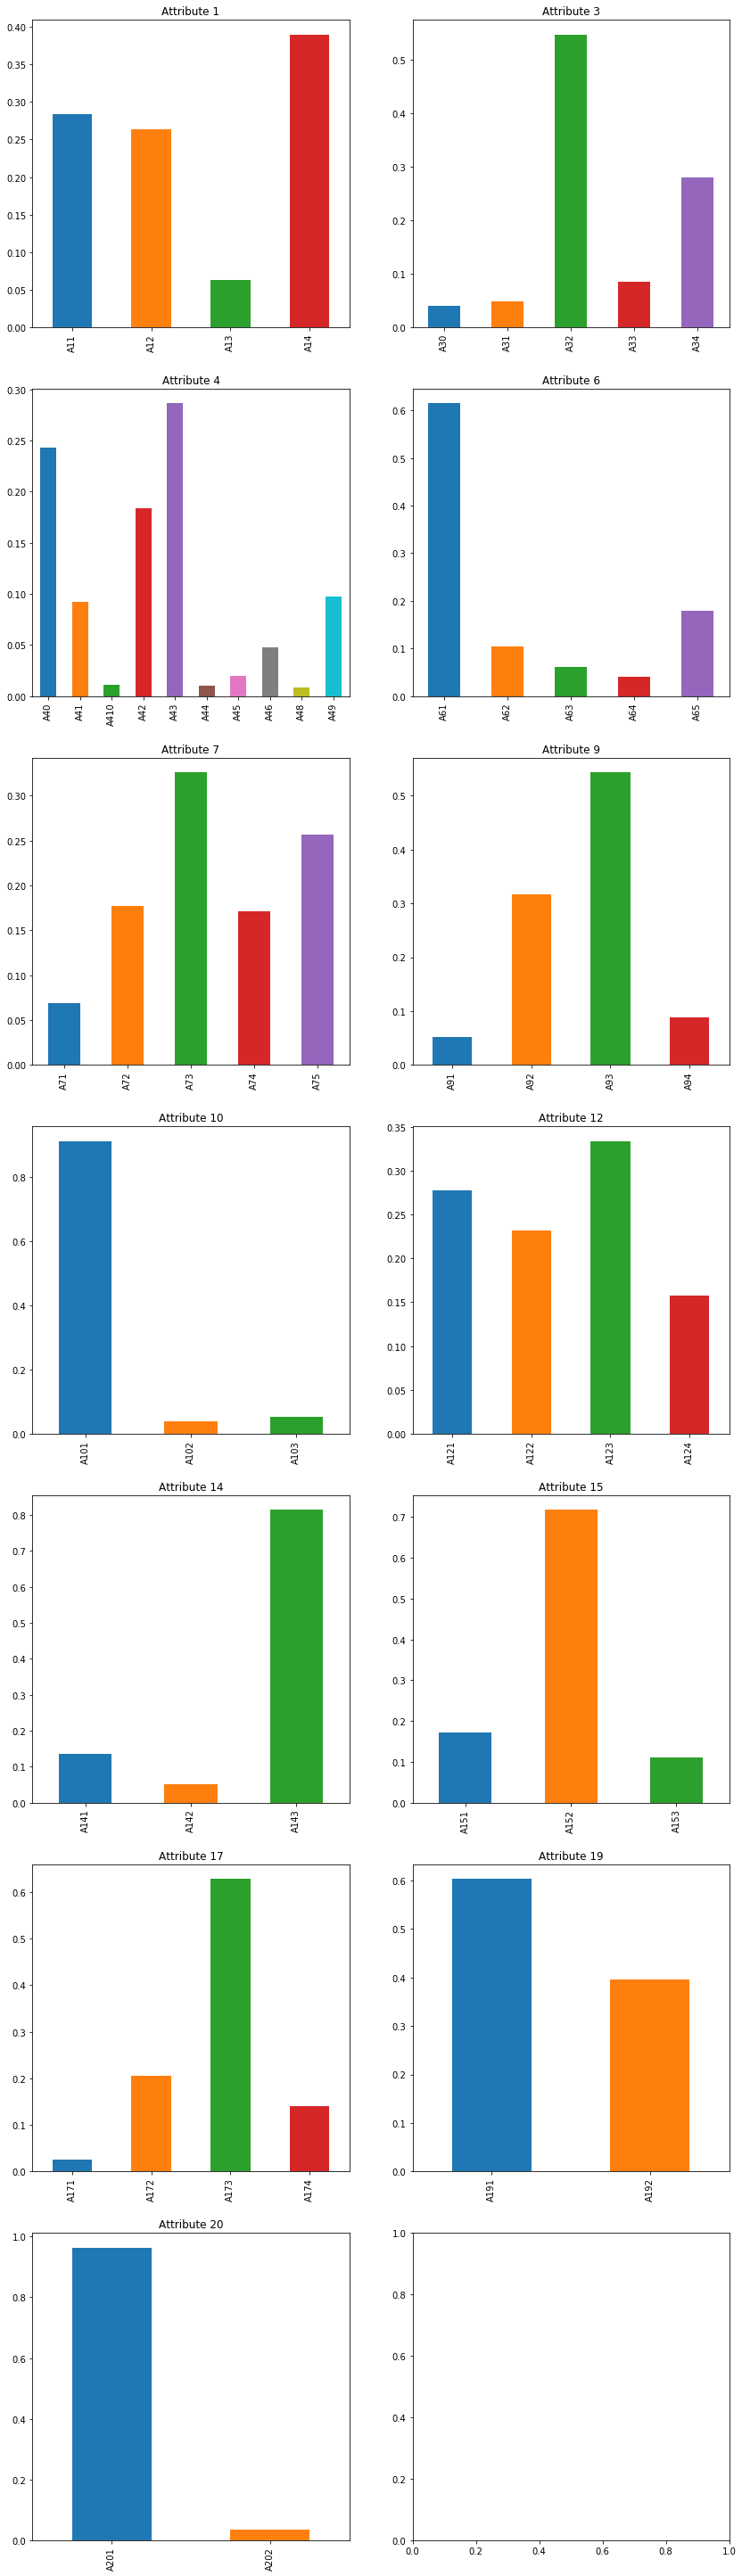

In [13]:
plot_attrs(traindata, [ "Attribute 1","Attribute 3","Attribute 4","Attribute 6","Attribute 7","Attribute 9","Attribute 10",
                        "Attribute 12","Attribute 14","Attribute 15","Attribute 17","Attribute 19","Attribute 20"], attr_type="Cat", plot=True)

- The bars show the distribution of different categories in all categorical attributes. 

In [14]:
col2=traindata.drop([ "Attribute 1","Attribute 3","Attribute 4","Attribute 6","Attribute 7","Attribute 9","Attribute 10",
                        "Attribute 12","Attribute 14","Attribute 15","Attribute 17","Attribute 19","Attribute 20"],axis=1).columns

In [15]:
list(col2)

['Attribute 2',
 'Attribute 5',
 'Attribute 8',
 'Attribute 11',
 'Attribute 13',
 'Attribute 16',
 'Attribute 18',
 'Credit Risk']

### - Distribution of each numerical attribute.

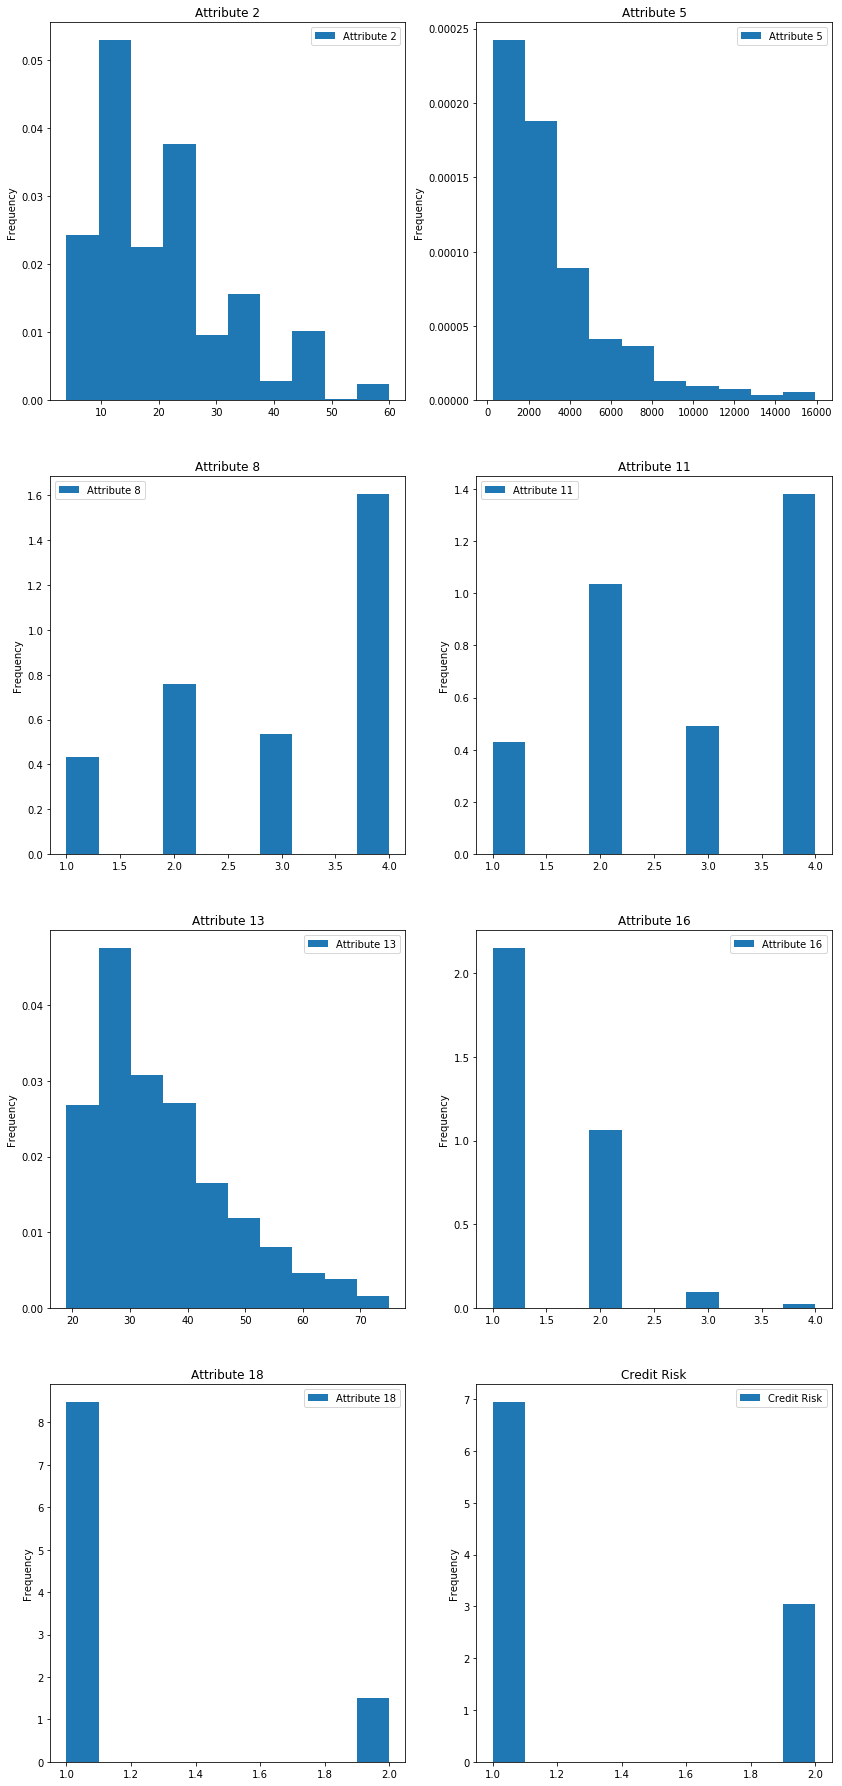

In [16]:
plot_attrs(traindata, list(col2), attr_type="Num")

- The bars show the distribution of different values in all numerical attributes. 

###  Conditional survival probability (condition on single attribute)

### - Categorical attributes

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


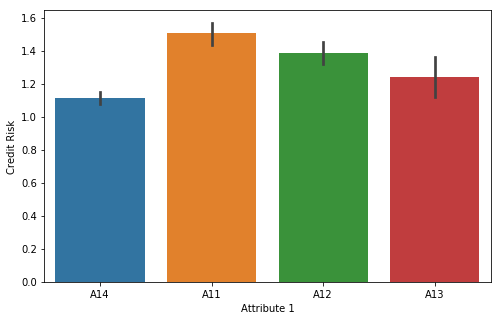

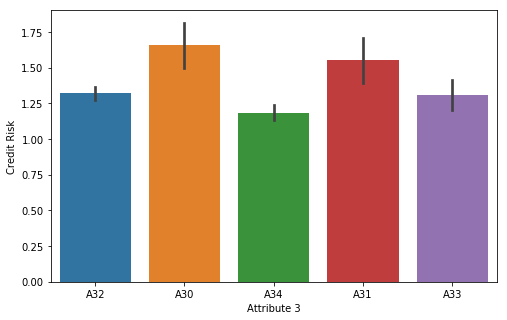

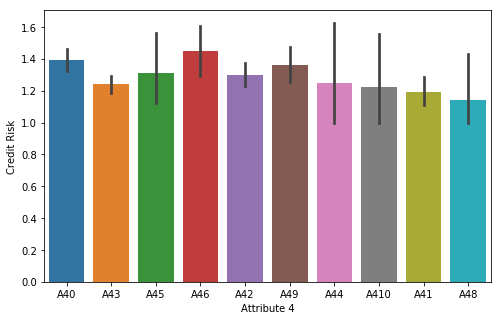

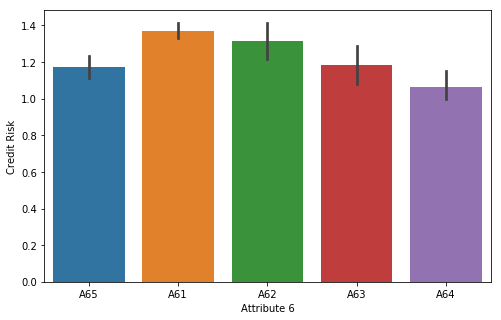

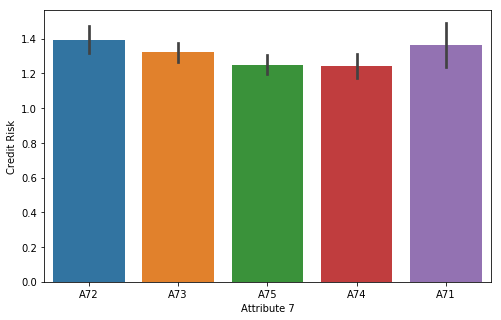

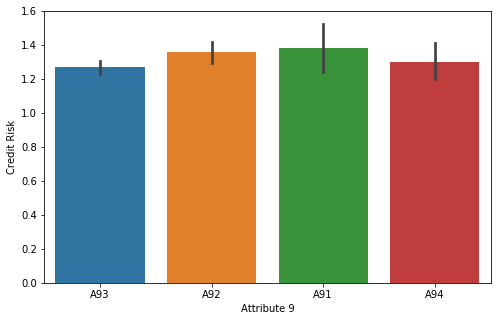

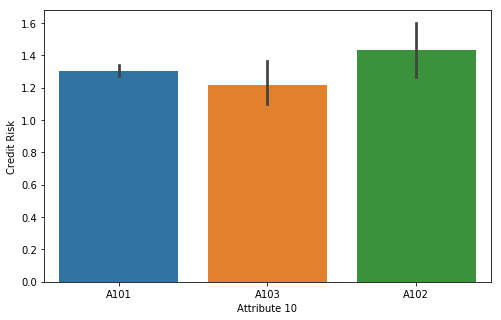

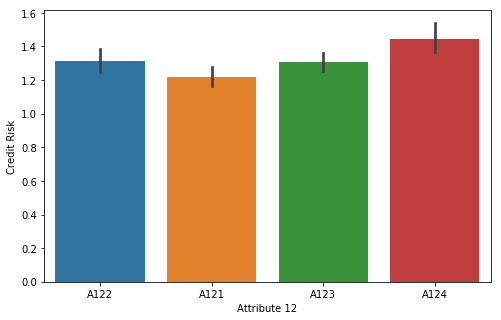

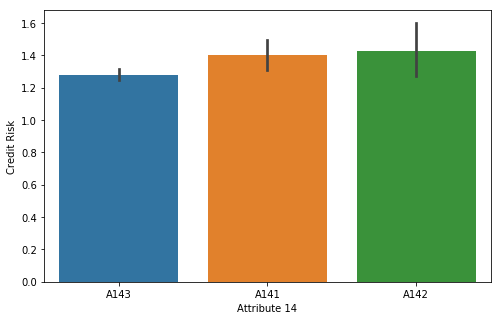

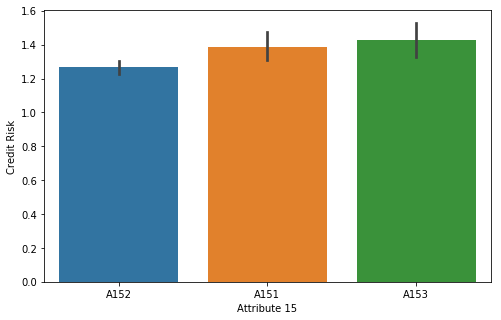

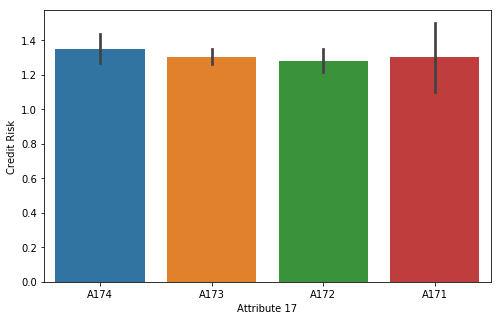

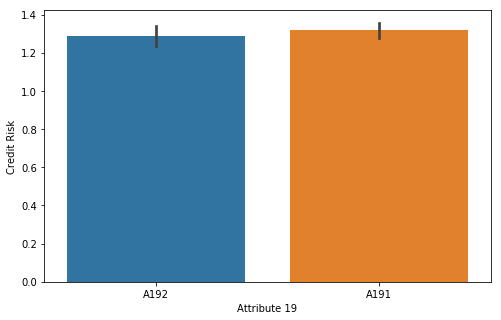

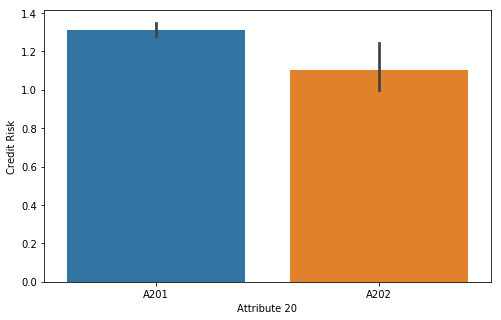

In [17]:
catattributes=["Attribute 1","Attribute 3","Attribute 4","Attribute 6","Attribute 7","Attribute 9","Attribute 10",
                        "Attribute 12","Attribute 14","Attribute 15","Attribute 17",'Attribute 19',"Attribute 20"]

for col in catattributes:
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax=sns.barplot(x=col, y="Credit Risk", data=traindata);

- Those bars plot above shows the distribution of the mean credit risk value of different categories in each categorical attribute.
- If in the bars varies obviously in certain attribute's figure, then it means this attribute could have a good prediction ability.

### - Numerical attributes

Text(0.5, 1.0, 'Attribute 2 Distribution Credit Risk 1 vs 2')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Attribute 2')

Text(0.5, 1.0, 'Attribute 5 Distribution Credit Risk 1 vs 2')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Attribute 5')

Text(0.5, 1.0, 'Attribute 8 Distribution Credit Risk 1 vs 2')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Attribute 8')

Text(0.5, 1.0, 'Attribute 11 Distribution Credit Risk 1 vs 2')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Attribute 11')

Text(0.5, 1.0, 'Attribute 13 Distribution Credit Risk 1 vs 2')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Attribute 13')

Text(0.5, 1.0, 'Attribute 16 Distribution Credit Risk 1 vs 2')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Attribute 16')

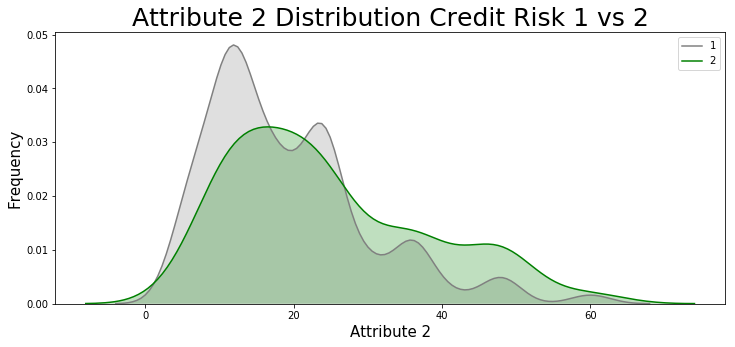

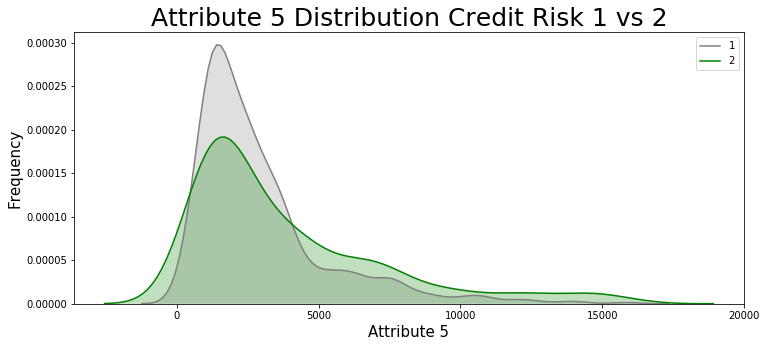

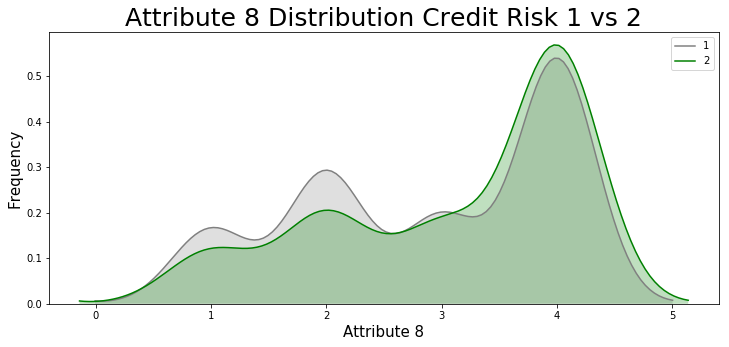

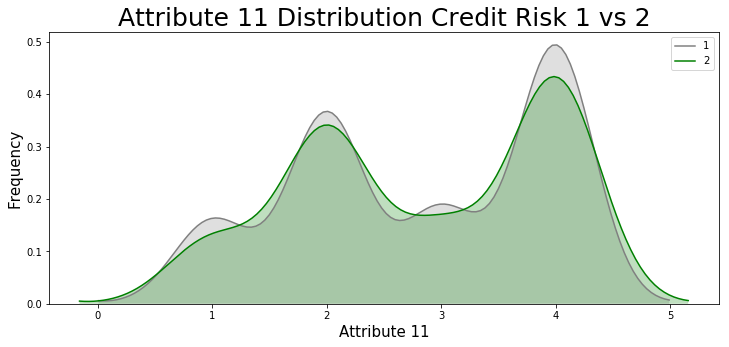

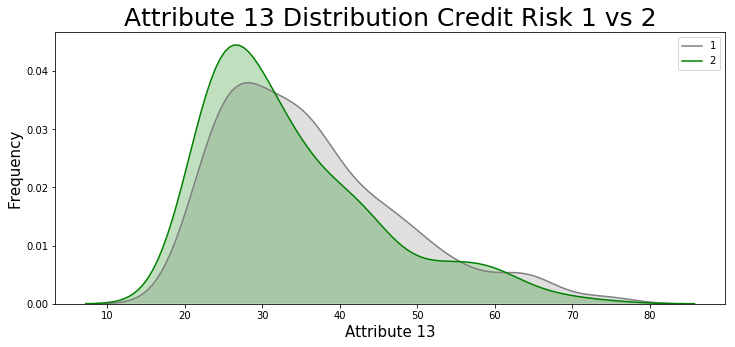

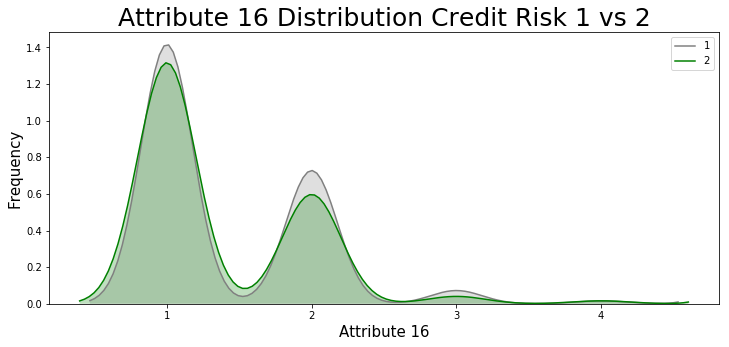

In [18]:
numattributes=col2=traindata.drop([ "Attribute 1","Attribute 3","Attribute 4","Attribute 6","Attribute 7","Attribute 9","Attribute 10",
                        "Attribute 12","Attribute 14","Attribute 15","Attribute 17","Attribute 18","Attribute 19","Attribute 20","Credit Risk"],axis=1).columns
for col in numattributes:
    fig = plt.figure(figsize=(12,5));
    ax=sns.kdeplot(traindata.loc[(traindata['Credit Risk'] == 1),col] , color='gray',shade=True,label='1');
    ax=sns.kdeplot(traindata.loc[(traindata['Credit Risk'] == 2),col] , color='g',shade=True, label='2');
    plt.title(col+' Distribution Credit Risk 1 vs 2', fontsize = 25);
    plt.ylabel("Frequency", fontsize = 15);
    plt.xlabel(col, fontsize = 15);

- Those curves plot above shows the distribution of credit risk 1 and 2 of different values in each numerical attribute.
- When the 1 curve and 2 curve have obvious difference, then it can tell us something happens at those values, and this could help us find better features.

# <font color="#0000dd"> Feature Engineering </font>

## Creating dummy variables
-  Categorical variables are an important features. While working with a dataset, we should have meaningful value. Our algorithms don't accept categorical variables as input, so we need to turn them to new features with values 0 and 1.
- In order to avoid the problem when using get_dummies (some times train and test features can't match because the categorical data's range of values):  
  I only select those features appeared in the training set, and if test set doesn't have that feature then fill in 0.

In [19]:
X_train = pd.get_dummies(X_train, columns=[ "Attribute 1","Attribute 3","Attribute 4","Attribute 6","Attribute 7","Attribute 9","Attribute 10",
                        "Attribute 12","Attribute 14","Attribute 15","Attribute 17",'Attribute 19',"Attribute 20"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=[ "Attribute 1","Attribute 3","Attribute 4","Attribute 6","Attribute 7","Attribute 9","Attribute 10",
                        "Attribute 12","Attribute 14","Attribute 15","Attribute 17",'Attribute 19',"Attribute 20"], drop_first=True)

In [20]:
col=X_train.columns
X=pd.DataFrame(columns=col)
X

,Attribute 2,Attribute 5,Attribute 8,Attribute 11,Attribute 13,Attribute 16,Attribute 18,Attribute 1_A12,Attribute 1_A13,Attribute 1_A14,...,Attribute 12_A124,Attribute 14_A142,Attribute 14_A143,Attribute 15_A152,Attribute 15_A153,Attribute 17_A172,Attribute 17_A173,Attribute 17_A174,Attribute 19_A192,Attribute 20_A202


In [21]:
X_train .head()

,Attribute 2,Attribute 5,Attribute 8,Attribute 11,Attribute 13,Attribute 16,Attribute 18,Attribute 1_A12,Attribute 1_A13,Attribute 1_A14,...,Attribute 12_A124,Attribute 14_A142,Attribute 14_A143,Attribute 15_A152,Attribute 15_A153,Attribute 17_A172,Attribute 17_A173,Attribute 17_A174,Attribute 19_A192,Attribute 20_A202
940,12,3527,2,3,45,1,2,0,0,1,...,0,0,1,1,0,0,0,1,1,0
862,24,2439,4,4,35,1,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
934,12,1498,4,1,23,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
557,21,5003,1,4,29,2,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
970,15,1514,4,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [22]:
X_test=pd.concat((X, X_test)).fillna(0)
X_test=X_test[col]
X_test.head()

,Attribute 2,Attribute 5,Attribute 8,Attribute 11,Attribute 13,Attribute 16,Attribute 18,Attribute 1_A12,Attribute 1_A13,Attribute 1_A14,...,Attribute 12_A124,Attribute 14_A142,Attribute 14_A143,Attribute 15_A152,Attribute 15_A153,Attribute 17_A172,Attribute 17_A173,Attribute 17_A174,Attribute 19_A192,Attribute 20_A202
390,18,1820,2,2,30,1,1,0,0,1,...,0,0,1,1,0,0,0,1,1,0
658,30,4221,2,1,28,2,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
794,24,3062,4,3,32,1,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0
337,15,1275,4,2,24,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
149,18,1582,4,4,46,2,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0


## Correlation Analysis and Reduction

- Below shows the heatmap of correlation matrix, we can find most of our features don't have strong relationship.
- Set threshold of correlation to 0.7, and delete the features with higher correlation.

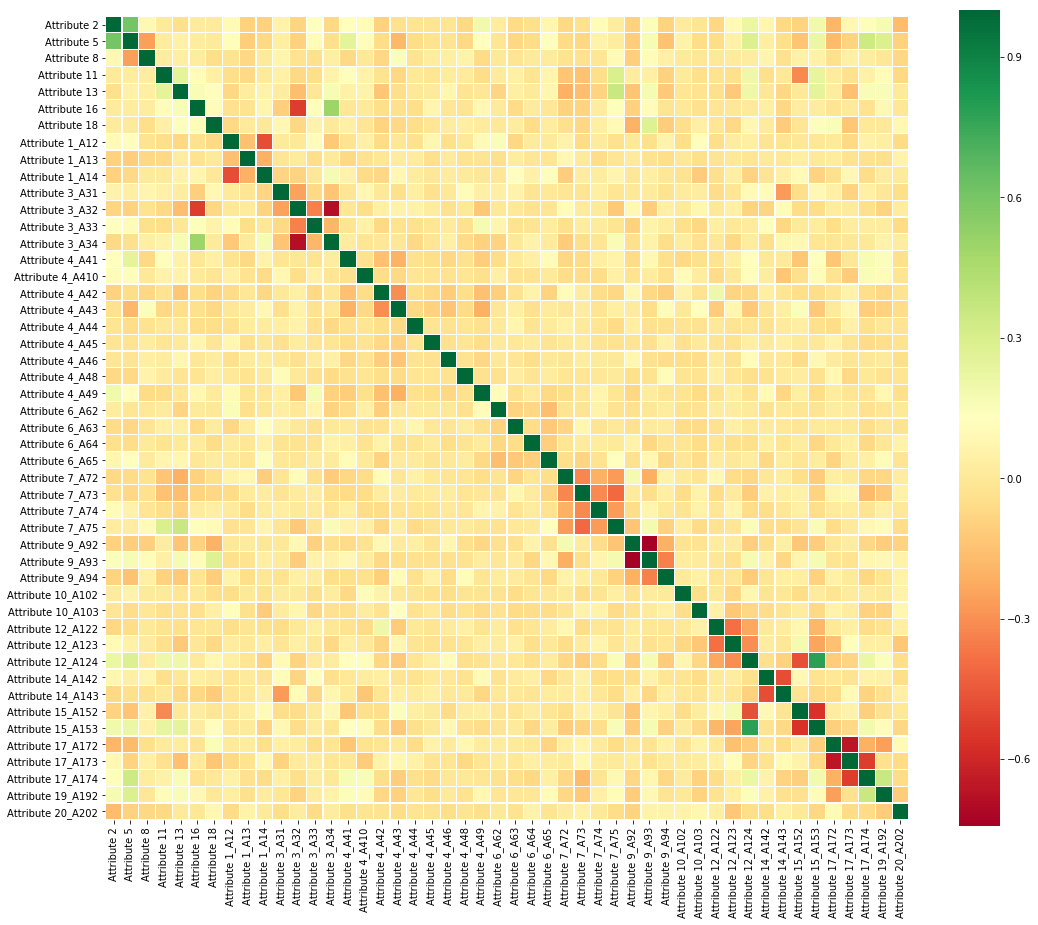

In [23]:
import seaborn as sns

def visualize_data_sns(df):
    df_corr = df.corr()
    f, ax = plt.subplots(figsize=(18, 15))

    sns.heatmap(df_corr, square=True, linewidths=0.2, cmap='RdYlGn', ax=ax)
    plt.savefig('corr.png', dpi=100)
    plt.show()
    
visualize_data_sns(X_train)

In [24]:
correlated_features = set()  
correlation_matrix = X_train.corr()  
for i in range(len(correlation_matrix .columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [25]:
correlated_features

{'Attribute 15_A153', 'Attribute 9_A93'}

In [26]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)  
X_test.drop(labels=correlated_features, axis=1, inplace=True) 

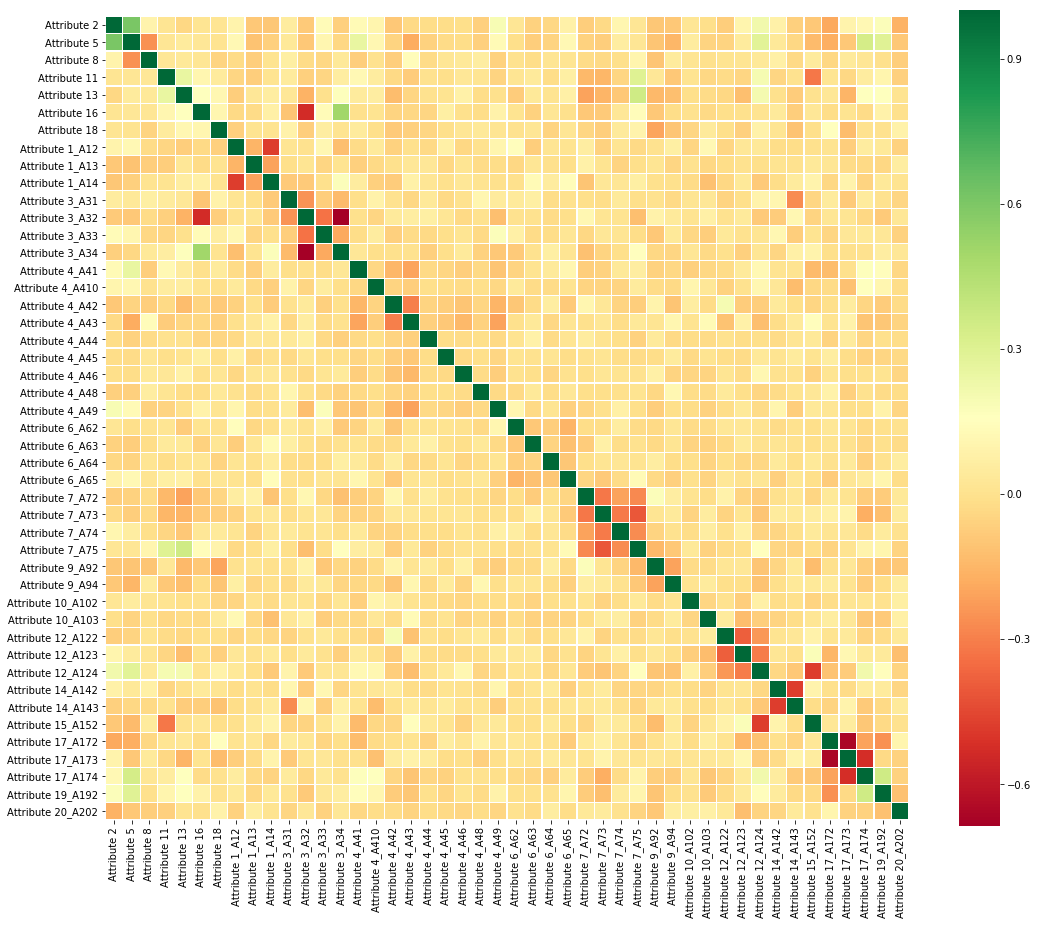

In [27]:
visualize_data_sns(X_train)

## Feature selection

### - Benefits:
    - Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
    - Improves Accuracy: Less misleading data means modeling accuracy improves.
    - Reduces Training Time: Less data means that algorithms train faste
### - What I do:
    - Using Extra Trees to estimate the importance of features.
    - The model gives an importance score for each attribute, the larger score the more important the attribute.
    - Delete several unimportant features based on the important scores to avoid overfitting.

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

[0.06638502 0.05630055 0.04271401 0.03642174 0.05870041 0.02647668
 0.01437281 0.02458593 0.01299031 0.08074407 0.01053949 0.0179917
 0.01464134 0.0260646  0.01546632 0.00375304 0.02552608 0.02598626
 0.00076112 0.00427801 0.01089621 0.00193342 0.01569829 0.01761657
 0.01083967 0.01260401 0.02269102 0.01575293 0.02325878 0.02236732
 0.01947031 0.02423404 0.01182652 0.01067282 0.01472411 0.02180991
 0.02525677 0.01742561 0.0074106  0.02821968 0.02256895 0.01249407
 0.02027184 0.01457542 0.02471224 0.00596939]


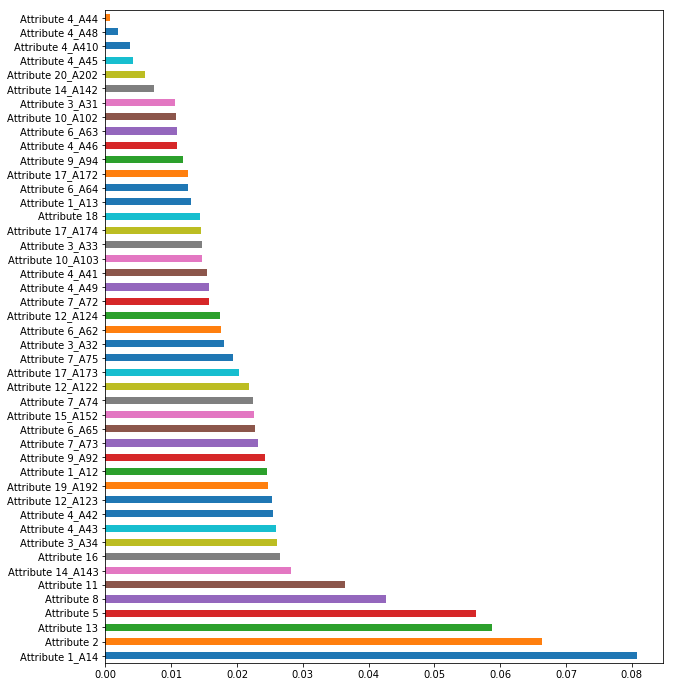

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(criterion='entropy')
model.fit(X_train, y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
fig = plt.figure(figsize=(10,12))
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(len(X_train.columns)).plot(kind='barh')
plt.show()

In [29]:
unimportantfeatures=set(feat_importances.nlargest(len(X_train.columns))[-6:].index)
unimportantfeatures

{'Attribute 14_A142',
 'Attribute 20_A202',
 'Attribute 4_A410',
 'Attribute 4_A44',
 'Attribute 4_A45',
 'Attribute 4_A48'}

In [30]:
X_train.drop(labels=unimportantfeatures, axis=1, inplace=True)  

In [31]:
X_test.drop(labels=unimportantfeatures, axis=1, inplace=True)

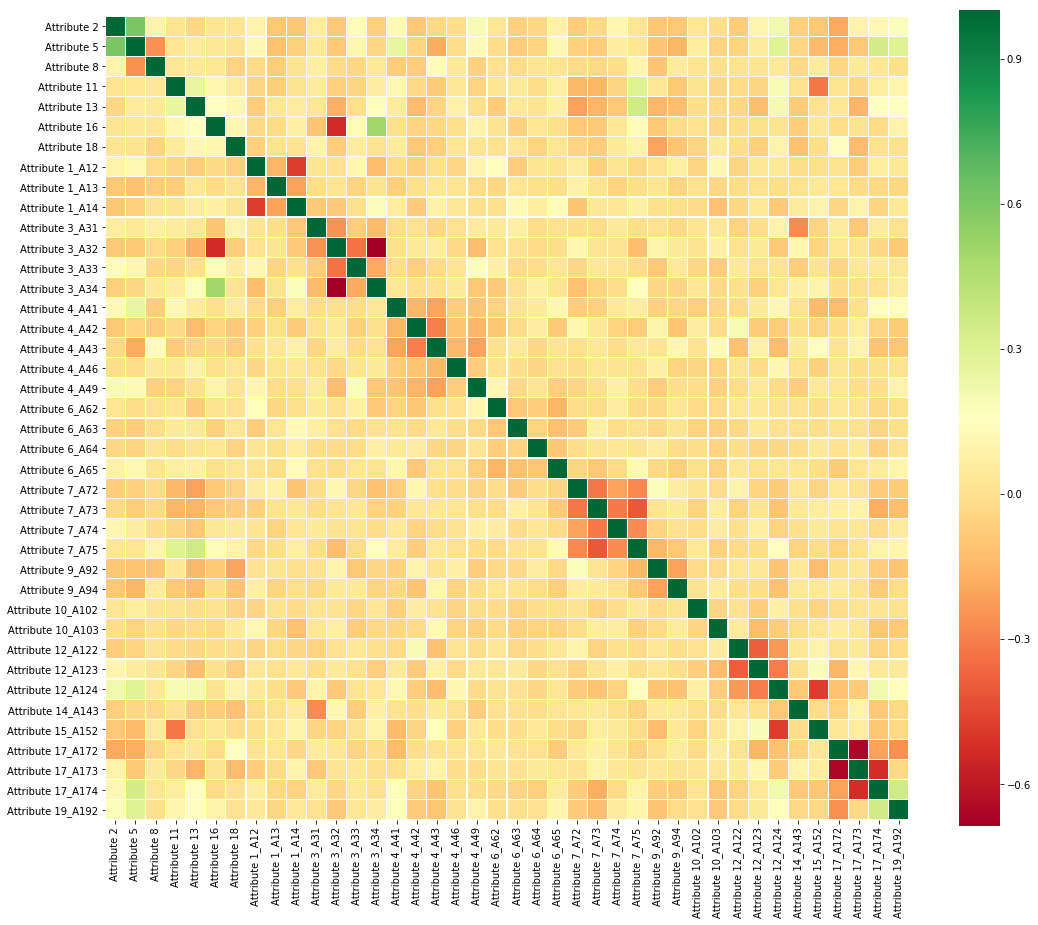

In [32]:
visualize_data_sns(X_train)

## Numerical Features Scaling

- Since the range of values of numerical features vary widely, in some machine learning algorithms, objective functions will not work properly without scaling. 
- Here I use the max value of each feature in train set to scale features in both training and test set.

In [33]:
X_stand_train = X_train.copy()
X_stand_test = X_test.copy()
for each in ['Attribute 2','Attribute 5','Attribute 8','Attribute 11','Attribute 13','Attribute 16','Attribute 18']:
    X_stand_train[each] = X_train[each]/(X_train[each].max())
    X_stand_test[each] = X_test[each]/(X_train[each].max())

# <font color="#0000dd"> Modeling the Data  </font><br/>   

- For all models below, I made a trade off between accuracy score and sensitive to credit 2. Since credit 2 implys the bad credit condition which might bring huge loss to our company, the sensitive to 2 is more important.   
    - Thus, I used 'class weight = balanced' instead of None.
    - Compared with real class weight, the accuracy declines about (0.02 - 0.07), but the sensitive of credit 2 increased about (0.2 - 0.4).  
    I believe this could work better in the real world.
    
    
- Moreover, I used GridSearchCV method to find better parameters and plot their learning curve to find whether they have overfitting problem. Then choose between different model parameters.


- For KNN and SVM model, I meet the problem of inbalanced prediction and tried to solve it through undersampling and PCA, which I will explain below.


- In conclusion part, I summarized the performance of all models I tried.



## 1. Logistic Regression model

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, preprocessing, model_selection 
from sklearn.model_selection import StratifiedKFold

logistic_clf = linear_model.LogisticRegression(solver='liblinear',class_weight='balanced')
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
logistic_clf.fit(X_stand_train, y_train)

y_pred_train= logistic_clf.predict(X_train)
y_pred_test = logistic_clf.predict(X_stand_test)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [36]:
SCORE_1s = cross_val_score(logistic_clf, X_stand_train, y_train, cv=stratified_k_fold)
SCORE_1=SCORE_1s.mean()
SCORE_1
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.7149331028555802

0.735

In [37]:
print ("Accuracy train : %.3f [%s]" %(SCORE_1,   "logreg_grid"))
print ("Accuracy test : %.3f [%s]" %(accuracy_score(y_test, y_pred_test),   "logreg_grid"))

Accuracy train : 0.715 [logreg_grid]
Accuracy test : 0.735 [logreg_grid]


In [38]:
cmb = metrics.confusion_matrix(y_test, logistic_clf.predict(X_stand_test))
print(cmb)

pd.crosstab(y_test, logistic_clf.predict(X_stand_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[110  34]
 [ 19  37]]


Predicted,1,2,All
True,,,
1,110,34,144
2,19,37,56
All,129,71,200


Sensitive 1 : 0.764 
Sensitive 2 : 0.661 


In [39]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
# effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
# Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
# Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

# setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = linear_model.LogisticRegression(solver='liblinear')
# Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=linear_model.LogisticRegression(class_weight='balanced'), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )

grid.fit(X_stand_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.7215
{'C': 0.9, 'penalty': 'l2'}
LogisticRegression(C=0.9, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [41]:
# Using best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X_stand_train, y_train)
logreg_grid.score(X_stand_test, y_test)
print ("Accuracy train : %.3f [%s]" %(logreg_grid.score(X_stand_train, y_train),   "logreg_grid"))
print ("Accuracy test : %.3f [%s]" %(logreg_grid.score(X_stand_test, y_test),   "logreg_grid"))

0.74125

0.725

Accuracy train : 0.741 [logreg_grid]
Accuracy test : 0.725 [logreg_grid]


In [42]:
cmb = metrics.confusion_matrix(y_test, logreg_grid.predict(X_stand_test))
print(cmb)

pd.crosstab(y_test, logreg_grid.predict(X_stand_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[108  36]
 [ 19  37]]


Predicted,1,2,All
True,,,
1,108,36,144
2,19,37,56
All,127,73,200


Sensitive 1 : 0.750 
Sensitive 2 : 0.661 


<Figure size 432x288 with 0 Axes>

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

([0.1625,
  0.2375,
  0.2625,
  0.253125,
  0.2575,
  0.2520833333333333,
  0.24821428571428572,
  0.240625,
  0.25555555555555554,
  0.25875],
 [0.32, 0.32, 0.3, 0.31, 0.32, 0.295, 0.285, 0.275, 0.27, 0.275])

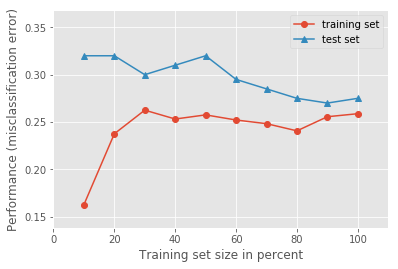

In [43]:
from mlxtend.plotting import plot_learning_curves
# learning curve
plt.figure()
plot_learning_curves(X_stand_train, y_train, X_stand_test, y_test, logreg_grid, print_model=False, style='ggplot')
plt.show()

## 2. KNN model

In [130]:
X_KNN = pd.concat([X_train[y_train==1][:len(y_train[y_train==2])],X_train[y_train==2]])

In [131]:
y_KNN = pd.concat([y_train[y_train==1][:len(y_train[y_train==2])],y_train[y_train==2]])

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
'''
from sklearn.preprocessing import StandardScaler,normalize
sc = StandardScaler()
X_train_knn=X_train.astype(float)
X_test_knn=X_test.astype(float)

## transforming "train"
X_train_knn[list(numattributes)] = sc.fit_transform(X_train_knn[list(numattributes)])
X_train_knn[list(numattributes)] = sc.transform(X_train_knn[list(numattributes)])

## transforming "test"
X_test_knn[list(numattributes)] = sc.transform(X_test_knn[list(numattributes)])

'''

# trying values for k
k_range = range(1,21)

weights_options=['uniform','distance']

param = {'n_neighbors':k_range, 'weights':weights_options}
# Using startifiedShufflesplit 
cv = StratifiedShuffleSplit(n_splits=50, test_size=.20, random_state=15)

grid = GridSearchCV(KNeighborsClassifier(algorithm='brute', leaf_size=50), param,cv=cv,verbose = False, n_jobs=-1)
# Fit model 
grid.fit(X_KNN, y_KNN)

'\nfrom sklearn.preprocessing import StandardScaler,normalize\nsc = StandardScaler()\nX_train_knn=X_train.astype(float)\nX_test_knn=X_test.astype(float)\n\n## transforming "train"\nX_train_knn[list(numattributes)] = sc.fit_transform(X_train_knn[list(numattributes)])\nX_train_knn[list(numattributes)] = sc.transform(X_train_knn[list(numattributes)])\n\n## transforming "test"\nX_test_knn[list(numattributes)] = sc.transform(X_test_knn[list(numattributes)])\n\n'

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=50, random_state=15, test_size=0.2,
            train_size=None),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [133]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.5710204081632653
{'n_neighbors': 19, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='brute', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')


In [134]:
knn = grid.best_estimator_
knn.score(X_KNN, y_KNN)
knn.score(X_test, y_test)
print ("Accuracy train : %.3f [%s]" %(knn.score(X_KNN, y_KNN),   "knn"))
print ("Accuracy test : %.3f [%s]" %(knn.score(X_test, y_test),   "knn"))

0.6229508196721312

0.51

Accuracy train : 0.623 [knn]
Accuracy test : 0.510 [knn]


In [135]:
cmb = metrics.confusion_matrix(y_test, knn.predict(X_test))
print(cmb)

pd.crosstab(y_test, knn.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[74 70]
 [28 28]]


Predicted,1,2,All
True,,,
1,74,70,144
2,28,28,56
All,102,98,200


Sensitive 1 : 0.514 
Sensitive 2 : 0.500 


<Figure size 432x288 with 0 Axes>

([0.325,
  0.3375,
  0.31666666666666665,
  0.30625,
  0.31,
  0.3020833333333333,
  0.30178571428571427,
  0.284375,
  0.2847222222222222,
  0.28375],
 [0.355, 0.305, 0.28, 0.28, 0.275, 0.285, 0.315, 0.315, 0.315, 0.31])

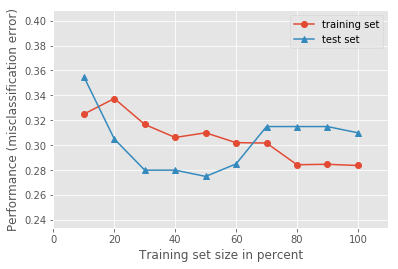

In [136]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, knn,print_model=False, style='ggplot')
plt.show()

#### - KNN:

- KNN is not a good model here, becuase accuracy of KNN severely degraded to credit 1 (high-dimension data), but credit 2 is bad credit which is more important. To solve this problem, I used undersampling here. It increased the sensitive 2 but reduce the accuracy score. 
- KNN can suffer from skewed class distributions. If a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large number = more common). Finally, the accuracy of KNN can be severely degraded with high-dimension data because there is little difference between the nearest and farthest neighbor.
- Further improvement:
    - dimensionality reduction: Since we have so many one hot encoding features, using PCA is inappropriate.
    - weighed voting, changing the distance metric for different applications (i.e. Hamming distance for text classification), rescaling data, dimensionality reduction, approximate Nearest Neighbor techniques.



## 3. Decision Tree model

In [51]:
from sklearn.tree import DecisionTreeClassifier

criterions=['gini','entropy']
for criterion in criterions:
    clf = DecisionTreeClassifier(class_weight='balanced',criterion=criterion, max_leaf_nodes=13)
    clf.fit(X_stand_train, y_train)
    print(criterion,"Training score:%f"%(clf.score(X_stand_train,y_train)))
    print(criterion,"Testing score:%f"%(clf.score(X_stand_test,y_test)))

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=13,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

gini Training score:0.701250
gini Testing score:0.630000


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=13,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

entropy Training score:0.673750
entropy Testing score:0.615000


In [52]:
decisiontree=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=13,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
decisiontree.fit(X_stand_train, y_train)
cmb = metrics.confusion_matrix(y_test, decisiontree.predict(X_stand_test))
print(cmb)

pd.crosstab(y_test, decisiontree.predict(X_stand_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=13,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

[[88 56]
 [18 38]]


Predicted,1,2,All
True,,,
1,88,56,144
2,18,38,56
All,106,94,200


Sensitive 1 : 0.611 
Sensitive 2 : 0.679 


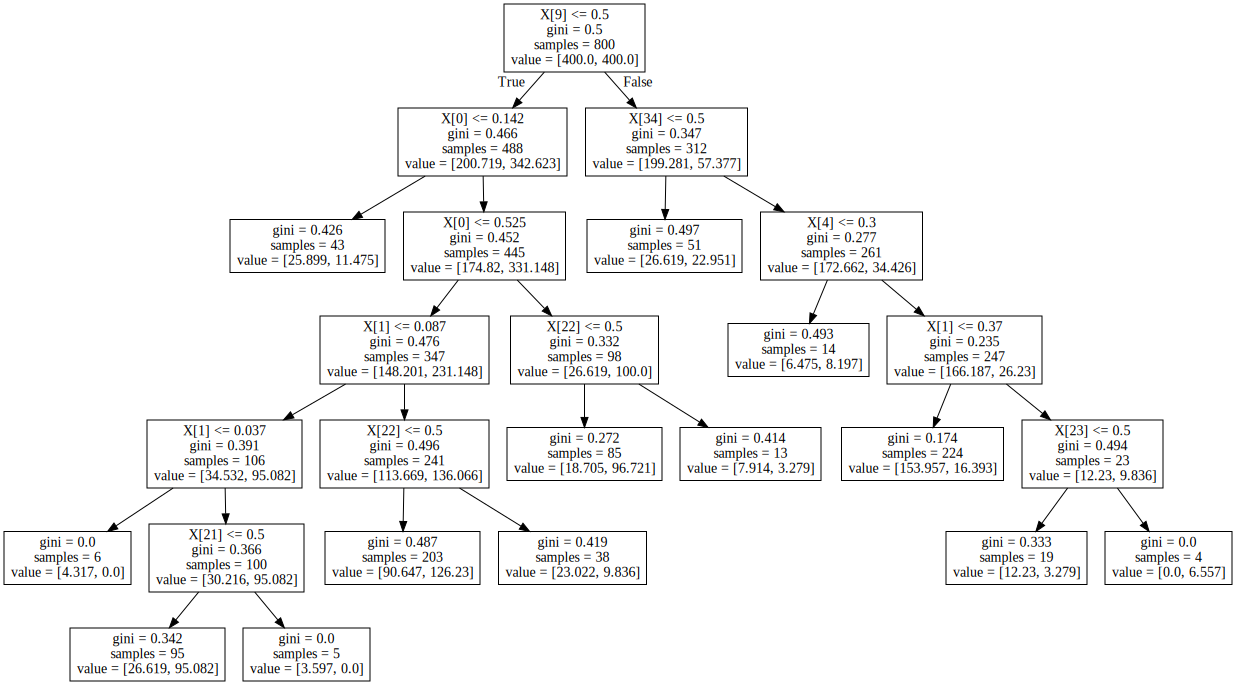

In [53]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(decisiontree,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [54]:
max_depth = range(1,25)
max_feature = [3,5,10,15,21,22,23,24,25,'auto']
criterion=["gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
decisionTree_grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=15), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=10,shuffle=True),
                                n_jobs = -1)
decisionTree_grid.fit(X_stand_train,y_train) 

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 25), 'max_features': [3, 5, 10, 15, 21, 22, 23, 24, 25, 'auto'], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [55]:
print( decisionTree_grid.best_params_)
print (decisionTree_grid.best_score_)
print (decisionTree_grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 25}
0.6875
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=25, max_leaf_nodes=15, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [56]:
dctree = decisionTree_grid.best_estimator_
# using the best found hyper paremeters to get the score. 
dctree.score(X_stand_train,y_train)
dctree.score(X_stand_test,y_test)

print ("Accuracy train : %.3f [%s]" %(dctree.score(X_stand_train,y_train),   "decisionTree_grid"))
print ("Accuracy test : %.3f [%s]" %(dctree.score(X_stand_test,y_test),   "decisionTree_grid"))

0.69125

0.575

Accuracy train : 0.691 [decisionTree_grid]
Accuracy test : 0.575 [decisionTree_grid]


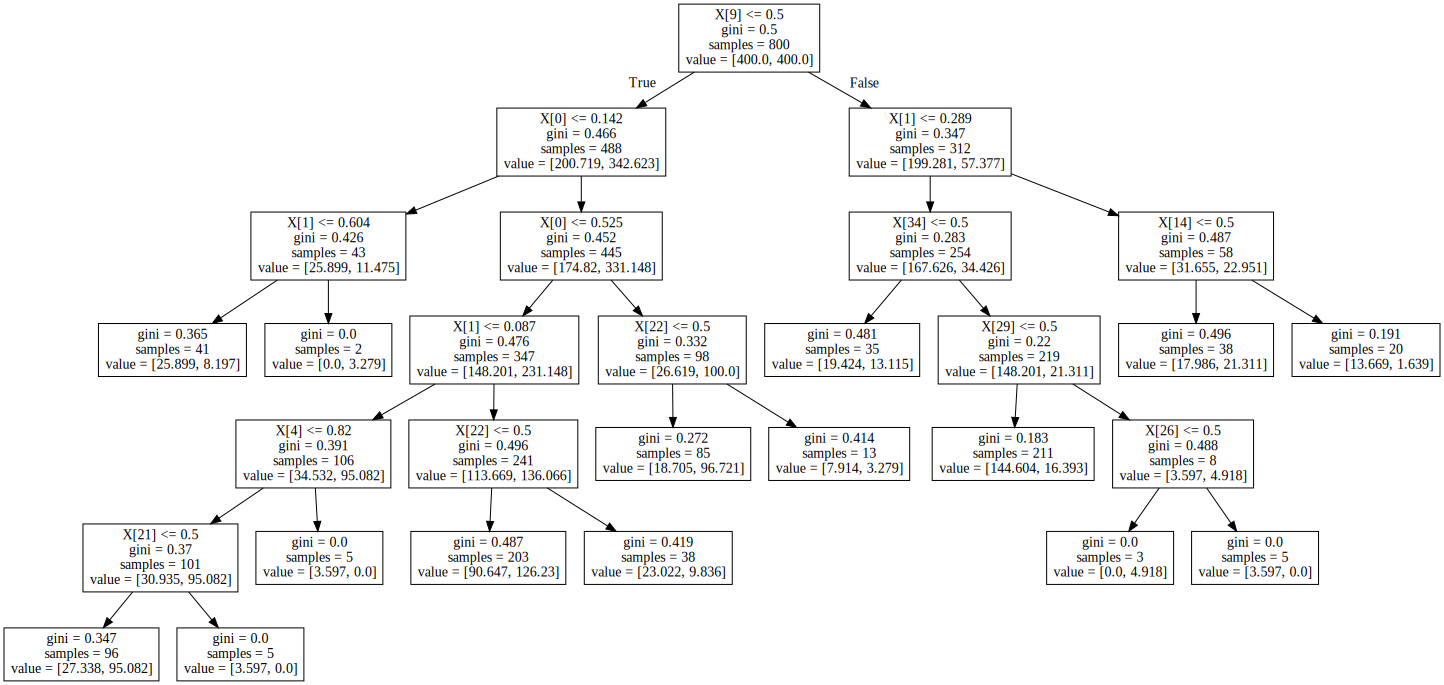

In [57]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dctree, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [58]:
cmb = metrics.confusion_matrix(y_test, dctree.predict(X_stand_test))
print(cmb)

pd.crosstab(y_test, dctree.predict(X_stand_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[76 68]
 [17 39]]


Predicted,1,2,All
True,,,
1,76,68,144
2,17,39,56
All,93,107,200


Sensitive 1 : 0.528 
Sensitive 2 : 0.696 


<Figure size 432x288 with 0 Axes>

([0.05,
  0.1875,
  0.2625,
  0.225,
  0.2275,
  0.21458333333333332,
  0.20714285714285716,
  0.275,
  0.24027777777777778,
  0.29875],
 [0.38, 0.36, 0.37, 0.335, 0.375, 0.4, 0.31, 0.365, 0.275, 0.39])

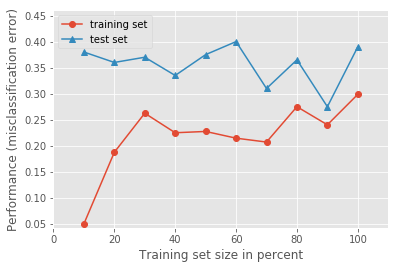

In [59]:
# learning curve
plt.figure()
plot_learning_curves(X_stand_train, y_train, X_stand_test, y_test, dctree, print_model=False, style='ggplot')
plt.show()

## 4. Random Forest model

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
modelR = RandomForestClassifier(class_weight='balanced',n_estimators=1000, criterion='entropy', max_depth=8, min_samples_split=10, min_samples_leaf=10, max_features=9 , oob_score=True, random_state=10)
modelR.fit(X_stand_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=8, max_features=9,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=True,
            random_state=10, verbose=0, warm_start=False)

In [61]:
y_train_pred = modelR.predict(X_stand_train)
acc_train = accuracy_score(y_train, y_train_pred)
y_test_pred = modelR.predict(X_stand_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [62]:
acc_train
acc_test

print ("Accuracy train : %.3f [%s]" %(acc_train,   "random_forest_modelR"))
print ("Accuracy test : %.3f [%s]" %(acc_test,   "random_forest_modelR"))

0.79625

0.725

Accuracy train : 0.796 [random_forest_modelR]
Accuracy test : 0.725 [random_forest_modelR]


In [63]:
cmb = metrics.confusion_matrix(y_test, modelR.predict(X_stand_test))
print(cmb)

pd.crosstab(y_test, modelR.predict(X_stand_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[107  37]
 [ 18  38]]


Predicted,1,2,All
True,,,
1,107,37,144
2,18,38,56
All,125,75,200


Sensitive 1 : 0.743 
Sensitive 2 : 0.679 


<Figure size 432x288 with 0 Axes>

([0.2,
  0.1875,
  0.21666666666666667,
  0.2,
  0.2075,
  0.18541666666666667,
  0.1982142857142857,
  0.2,
  0.20555555555555555,
  0.20375],
 [0.325, 0.33, 0.33, 0.32, 0.3, 0.275, 0.26, 0.28, 0.27, 0.275])

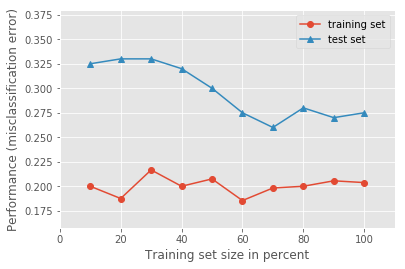

In [64]:
#plot learning curves

plt.figure()
plot_learning_curves(X_stand_train, y_train, X_stand_test, y_test, modelR, print_model=False, style='ggplot')
plt.show()

Kindly reminder: this random forest_grid will take several mins, please wait. :-D

In [65]:
n_estimators = [100,300,500,800,1000]
max_depth = range(1,20)
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators, 
         'max_depth':max_depth, 
        }
randomforest_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
randomforest_grid.fit(X_stand_train, y_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 300, 500, 800, 1000], 'max_depth': range(1, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
print (randomforest_grid.best_score_)
print (randomforest_grid.best_params_)
print (randomforest_grid.best_estimator_)

0.7516666666666667
{'max_depth': 14, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=14, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


In [67]:
random_forest = randomforest_grid.best_estimator_
random_forest.score(X_stand_train, y_train)
random_forest.score(X_stand_test,y_test)
print ("Accuracy train : %.3f [%s]" %(random_forest.score(X_stand_train, y_train),   "random_forest"))
print ("Accuracy test : %.3f [%s]" %(random_forest.score(X_stand_test,y_test),   "random_forest"))

1.0

0.745

Accuracy train : 1.000 [random_forest]
Accuracy test : 0.745 [random_forest]


In [68]:
cmb = metrics.confusion_matrix(y_test, random_forest.predict(X_stand_test))
print(cmb)

pd.crosstab(y_test, random_forest.predict(X_stand_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[130  14]
 [ 37  19]]


Predicted,1,2,All
True,,,
1,130,14,144
2,37,19,56
All,167,33,200


Sensitive 1 : 0.903 
Sensitive 2 : 0.339 


<Figure size 432x288 with 0 Axes>

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.32, 0.295, 0.26, 0.265, 0.265, 0.24, 0.265, 0.24, 0.255, 0.28])

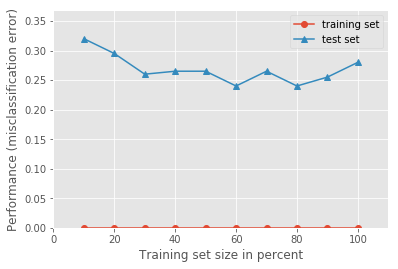

In [69]:
#plot learning curves

plt.figure()
plot_learning_curves(X_stand_train, y_train, X_stand_test, y_test, random_forest, print_model=False, style='ggplot')
plt.show()

- The gridsearch of random forest model is easy to have overfitting problem.

## 5. SVM model

In [70]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(X_stand_train)
X_t_train = pca.transform(X_stand_train)
X_t_test = pca.transform(X_stand_test)
svc = SVC(kernel="sigmoid", C=0.7, gamma=0.01, coef0=0.0001, class_weight='balanced', tol=0.0001, max_iter=-1)
svc.fit(X_t_train, y_train)

print ("Accuracy train : %.3f [%s]" %(svc.score(X_t_train, y_train),   "svc"))
print ("Accuracy test : %.3f [%s]" %(svc.score(X_t_test, y_test),   "svc"))

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

SVC(C=0.7, cache_size=200, class_weight='balanced', coef0=0.0001,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

Accuracy train : 0.635 [svc]
Accuracy test : 0.650 [svc]


In [71]:
cmb = metrics.confusion_matrix(y_test, svc.predict(X_t_test))
print(cmb)

pd.crosstab(y_test, svc.predict(X_t_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[86 58]
 [12 44]]


Predicted,1,2,All
True,,,
1,86,58,144
2,12,44,56
All,98,102,200


Sensitive 1 : 0.597 
Sensitive 2 : 0.786 


In [72]:
Cs = [0.65,0.7,0.75,0.8,0.85] ## penalty parameter C for the error term. 
gammas = [0.01,0.012,0.014,0.016,0.018,0.02]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.20)
grid_search = GridSearchCV(SVC(kernel = 'sigmoid',class_weight='balanced'), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X_t_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.2,
            train_size=None),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.65, 0.7, 0.75, 0.8, 0.85], 'gamma': [0.01, 0.012, 0.014, 0.016, 0.018, 0.02]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.65875
{'C': 0.85, 'gamma': 0.02}
SVC(C=0.85, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.02, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [74]:
## using the best found hyper paremeters to get the score. 
svm_grid = grid_search.best_estimator_
svm_grid.fit(X_t_train, y_train)
svm_grid.score(X_t_train, y_train)
svm_grid.score(X_t_test,y_test)
print ("Accuracy train : %.3f [%s]" %(svm_grid.score(X_t_train, y_train),   "svm_grid"))
print ("Accuracy test : %.3f [%s]" %(svm_grid.score(X_t_test,y_test),   "svm_grid"))

SVC(C=0.85, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.02, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.63625

0.635

Accuracy train : 0.636 [svm_grid]
Accuracy test : 0.635 [svm_grid]


In [75]:
cmb = metrics.confusion_matrix(y_test, svm_grid.predict(X_t_test))
print(cmb)

pd.crosstab(y_test, svm_grid.predict(X_t_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[85 59]
 [14 42]]


Predicted,1,2,All
True,,,
1,85,59,144
2,14,42,56
All,99,101,200


Sensitive 1 : 0.590 
Sensitive 2 : 0.750 


<Figure size 432x288 with 0 Axes>

([0.525,
  0.425,
  0.3625,
  0.353125,
  0.35,
  0.35208333333333336,
  0.3517857142857143,
  0.3625,
  0.375,
  0.37375],
 [0.675, 0.465, 0.415, 0.39, 0.4, 0.385, 0.385, 0.385, 0.385, 0.385])

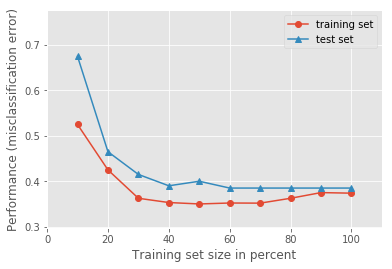

In [76]:
#plot learning curves

plt.figure()
plot_learning_curves(X_stand_train, y_train, X_stand_test, y_test, svm_grid, print_model=False, style='ggplot')
plt.show()

#### - SVM:

- If using original data, accuracy of SVM severely degraded to credit 1 (high-dimension data), but credit 2 is bad credit which is more important. So here I did PCA first, and then used the preprocessed data to fit SVM model, which improved the performance. But the sensitive 1 reduced accordingly and thus accuracy score reduced.
- SVM classifier trained on an imbalanced dataset can produce suboptimal models which are biased towards the majority class and have low performance on the minority class.
- Further improvement:
    - change the misclassification penalty per class
    - Resampling methods to make a balance between sensitive 1 and 2
    - Different Error Costs (DEC)


## 6. ExtraTreesClassifier model

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier(n_estimators=800)
ExtraTreesClassifier.fit(X_stand_train, y_train)
y_pred = ExtraTreesClassifier.predict(X_stand_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 4)


print ("Accuracy train : %.3f [%s]" %(round(ExtraTreesClassifier.score(X_stand_train, y_train)),   "ExtraTreesClassifier"))
print ("Accuracy test : %.3f [%s]" %(extraTree_accy,   "ExtraTreesClassifier"))

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Accuracy train : 1.000 [ExtraTreesClassifier]
Accuracy test : 0.745 [ExtraTreesClassifier]


In [78]:
cmb = metrics.confusion_matrix(y_test, ExtraTreesClassifier.predict(X_stand_test))
print(cmb)

pd.crosstab(y_test, ExtraTreesClassifier.predict(X_stand_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[127  17]
 [ 34  22]]


Predicted,1,2,All
True,,,
1,127,17,144
2,34,22,56
All,161,39,200


Sensitive 1 : 0.882 
Sensitive 2 : 0.393 


<Figure size 432x288 with 0 Axes>

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.35, 0.26, 0.31, 0.28, 0.265, 0.28, 0.23, 0.235, 0.24, 0.25])

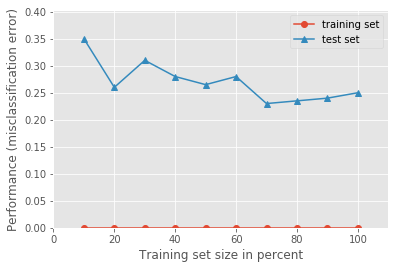

In [79]:
#plot learning curves
plt.figure()
plot_learning_curves(X_stand_train, y_train, X_stand_test, y_test, ExtraTreesClassifier, print_model=False, style='ggplot')
plt.show()

# Ensemble Methods
- Ensemble methods are meta-algorithms that combine several machine learning models into one predictive model, in order to:  
    - decrease variance (bagging)
    - decrese bias (boosting)
    - improve predictions (stacking)

### Boosting model:

- Boosting refers to a family of algorithms that are able to convert weak learners to strong learners. 
- The main principle of boosting is to fit a sequence of weak learners (models that are only slightly better than random guessing, such as small decision trees) to weighted versions of the data, where more weight is given to examples that were mis-classified by earlier rounds. The predictions are then combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction.
- Here I tried AdaBoostClassifier and XGBClassifier model, but did't search their optimal parameter.

## 7.  AdaBoostClassifier model

In [80]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_stand_train, y_train)
y_pred = adaboost.predict(X_stand_test)
adaboost_accy = round(accuracy_score(y_pred, y_test), 3)

print ("Accuracy train : %.3f [%s]" %(round(adaboost.score(X_stand_train, y_train)),   "AdaBoostClassifier"))
print ("Accuracy test : %.3f [%s]" %(adaboost_accy,   "AdaBoostClassifier"))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

Accuracy train : 1.000 [AdaBoostClassifier]
Accuracy test : 0.745 [AdaBoostClassifier]


In [81]:
cmb = metrics.confusion_matrix(y_test, adaboost.predict(X_stand_test))
print(cmb)

pd.crosstab(y_test, adaboost.predict(X_stand_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[126  18]
 [ 33  23]]


Predicted,1,2,All
True,,,
1,126,18,144
2,33,23,56
All,159,41,200


Sensitive 1 : 0.875 
Sensitive 2 : 0.411 


<Figure size 432x288 with 0 Axes>

([0.0,
  0.125,
  0.1875,
  0.175,
  0.1875,
  0.19791666666666666,
  0.21428571428571427,
  0.209375,
  0.20555555555555555,
  0.21125],
 [0.37, 0.345, 0.295, 0.305, 0.245, 0.225, 0.235, 0.24, 0.235, 0.255])

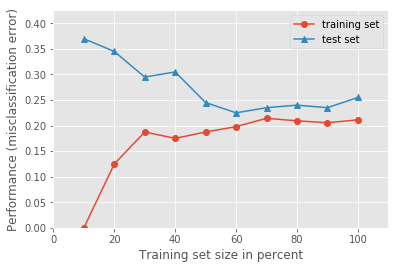

In [82]:
#plot learning curves

plt.figure()
plot_learning_curves(X_stand_train, y_train, X_stand_test, y_test, adaboost, print_model=False, style='ggplot')
plt.show()

## 8. XGBClassifier model

In [141]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_stand_train, y_train)
y_pred = XGBClassifier.predict(X_stand_test)
XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
XGBClassifiertrain=round(accuracy_score(XGBClassifier.predict(X_stand_train), y_train), 3)
print ("Accuracy train : %.3f [%s]" %(XGBClassifiertrain,   "XGBClassifier"))
print ("Accuracy test : %.3f [%s]" %(XGBClassifier_accy,   "XGBClassifier"))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Accuracy train : 0.874 [XGBClassifier]
Accuracy test : 0.750 [XGBClassifier]


In [142]:
cmb = metrics.confusion_matrix(y_test, XGBClassifier.predict(X_stand_test))
print(cmb)

pd.crosstab(y_test, XGBClassifier.predict(X_stand_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[131  13]
 [ 37  19]]


Predicted,1,2,All
True,,,
1,131,13,144
2,37,19,56
All,168,32,200


Sensitive 1 : 0.910 
Sensitive 2 : 0.339 


<Figure size 432x288 with 0 Axes>

([0.0,
  0.01875,
  0.05416666666666667,
  0.05625,
  0.0875,
  0.12291666666666666,
  0.13035714285714287,
  0.1390625,
  0.12083333333333333,
  0.12625],
 [0.36, 0.315, 0.305, 0.315, 0.265, 0.24, 0.245, 0.21, 0.245, 0.25])

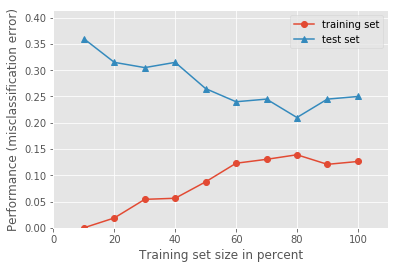

In [143]:
#plot learning curves

plt.figure()
plot_learning_curves(X_stand_train, y_train, X_stand_test, y_test, XGBClassifier, print_model=False, style='ggplot')
plt.show()

# 9. Bagging model

- Bagging stands for bootstrap aggregation. It's a way to reduce the variance of an estimate is to average together multiple estimates. 
- Here I use Decision tree as base estimator and compute the ensemble.

In [86]:
import matplotlib.gridspec as gridspec
from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves

In [87]:
bagging = BaggingClassifier(base_estimator=dctree, n_estimators=150, max_samples=0.8)

In [88]:
scores = cross_val_score(bagging, X_stand_train, y_train, cv=5, scoring='accuracy')
print ("Accuracy train : %.3f (+/- %.2f) [%s]" %(scores.mean(), scores.std(),  "Bagging"))
bagging.fit(X_stand_train, y_train.values)
print ("Accuracy test: %.3f [%s]" %(bagging.score(X_stand_test, y_test), "Bagging"))

Accuracy train : 0.693 (+/- 0.03) [Bagging]


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=25, max_leaf_nodes=15, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=150, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

Accuracy test: 0.715 [Bagging]


In [89]:
cmb = metrics.confusion_matrix(y_test, bagging.predict(X_stand_test))
print(cmb)

pd.crosstab(y_test, bagging.predict(X_stand_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

[[104  40]
 [ 17  39]]


Predicted,1,2,All
True,,,
1,104,40,144
2,17,39,56
All,121,79,200


Sensitive 1 : 0.722 
Sensitive 2 : 0.696 


<Figure size 432x288 with 0 Axes>

([0.0,
  0.01875,
  0.08333333333333333,
  0.125,
  0.15,
  0.1625,
  0.1982142857142857,
  0.21875,
  0.21666666666666667,
  0.2175],
 [0.325, 0.315, 0.32, 0.345, 0.25, 0.245, 0.285, 0.295, 0.275, 0.265])

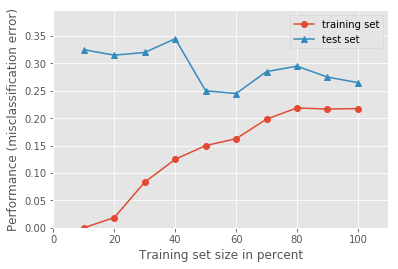

In [90]:
plt.figure()
plot_learning_curves(X_stand_train, y_train, X_stand_test, y_test,bagging, print_model=False, style='ggplot')
plt.show()

# 10. Stacking model
- Stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. 
- I choose 'Logistic regression','Decision Tree','Random Forest' as base models. Stacking model is trained on the outputs of these base model, which act as new features. 

In [91]:
clf0 = logreg_grid     
clf1 = dctree
clf2 = modelR
lr = linear_model.LogisticRegression(solver='liblinear')
sclf = StackingClassifier(classifiers=[clf0,clf1,clf2], 
                          meta_classifier=lr)

In [92]:
label = ['LR','Decision Tree','Random Forest','Stacking Classifier']
clf_list = [clf0,clf1,clf2,sclf]
    
fig = plt.figure(figsize=(10,8))

clf_cv_mean = []
clf_cv_std = []
for clf, label in zip(clf_list, label):
    
    scores = cross_val_score(clf, X_stand_train, y_train.values, cv=5, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())    
    clf.fit(X_stand_train, y_train.values)
    print ("Accuracy test: %.2f [%s]" %(clf.score(X_stand_test, y_test), label))
    print ("------------------------------------------------------------------------------------")

Accuracy: 0.71 (+/- 0.04) [LR]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LogisticRegression(C=0.9, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

Accuracy test: 0.72 [LR]
------------------------------------------------------------------------------------
Accuracy: 0.62 (+/- 0.01) [Decision Tree]


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=25, max_leaf_nodes=15, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Accuracy test: 0.69 [Decision Tree]
------------------------------------------------------------------------------------
Accuracy: 0.70 (+/- 0.03) [Random Forest]


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=8, max_features=9,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=True,
            random_state=10, verbose=0, warm_start=False)

Accuracy test: 0.72 [Random Forest]
------------------------------------------------------------------------------------


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy: 0.71 (+/- 0.03) [Stacking Classifier]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
          classifiers=[LogisticRegression(C=0.9, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False), DecisionTreeClas...mators=1000, n_jobs=None, oob_score=True,
            random_state=10, verbose=0, warm_start=False)],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)

Accuracy test: 0.73 [Stacking Classifier]
------------------------------------------------------------------------------------


<Figure size 720x576 with 0 Axes>

In [93]:
from sklearn import metrics
sclf.fit(X_stand_train, y_train)
cmb = metrics.confusion_matrix(y_test, sclf.predict(X_stand_test))
print(cmb)

pd.crosstab(y_test, sclf.predict(X_stand_test), rownames=['True'], colnames=['Predicted'], margins=True)

s1=cmb[0][0]/sum(cmb[0,:])
print ("Sensitive 1 : %.3f " %(s1))

s2=cmb[1][1]/sum(cmb[1,:])
print ("Sensitive 2 : %.3f " %(s2))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
          classifiers=[LogisticRegression(C=0.9, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False), DecisionTreeClas...mators=1000, n_jobs=None, oob_score=True,
            random_state=10, verbose=0, warm_start=False)],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)

[[117  27]
 [ 27  29]]


Predicted,1,2,All
True,,,
1,117,27,144
2,27,29,56
All,144,56,200


Sensitive 1 : 0.812 
Sensitive 2 : 0.518 


<Figure size 1296x432 with 0 Axes>

([<matplotlib.axis.XTick at 0x1a240a8a20>,
 <a list of 4 Text xticklabel objects>)

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Classifier')

Text(0.5, 1.0, 'Stacking Ensemble')

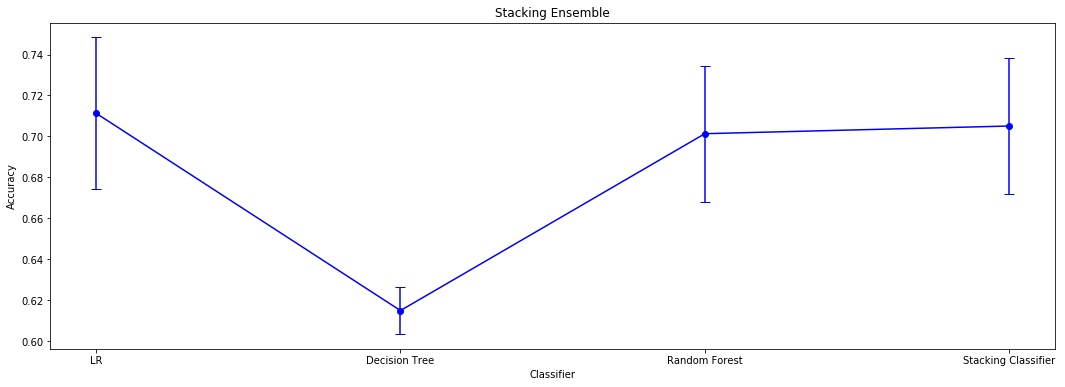

In [94]:
#plot classifier accuracy    
plt.figure(figsize=(18,6))
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['LR','Decision Tree','Random Forest','Stacking Classifier'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()

<Figure size 432x288 with 0 Axes>

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

([0.05,
  0.18125,
  0.1625,
  0.15,
  0.18,
  0.16041666666666668,
  0.19107142857142856,
  0.2046875,
  0.20833333333333334,
  0.19125],
 [0.38, 0.335, 0.3, 0.345, 0.3, 0.28, 0.285, 0.28, 0.28, 0.225])

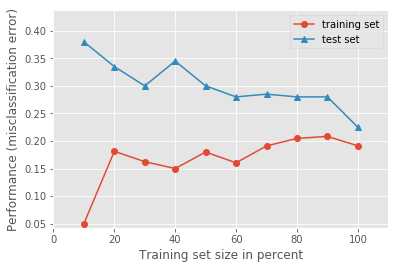

In [98]:
#plot learning curves
plt.figure()
plot_learning_curves(X_stand_train, y_train, X_stand_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()

# <font color="#0000dd"> Conclusion  </font><br/>   

In [144]:
credit_models = [logreg_grid, knn, dctree, modelR, svc,XGBClassifier,adaboost,ExtraTreesClassifier,bagging, sclf]
label_models = ['LogReg','knn', 'Decision tree', 'Random forest', 'SVM','XGBClassifier','Adaboost','ExtraTreesClassifier','Bagging', 'Stacking']


showall = pd.DataFrame(columns=["Model name","Model","Accuracy","Sensitive 1","Sensitive 2"])
j=0
for credit_model in credit_models:
    if j==1:
        credit_model=credit_model.fit(X_KNN,y_KNN)
        a = credit_model.predict(X_test)
    elif j==4:  
        credit_model=credit_model.fit(X_t_train,y_train)
        a = credit_model.predict(X_t_test)  
    else:
        credit_model=credit_model.fit(X_stand_train,y_train)
        a = credit_model.predict(X_stand_test)
    b = accuracy_score(a, y_test)
    cmb = metrics.confusion_matrix(y_test, a)
    s1=cmb[0][0]/sum(cmb[0,:])
    s2=cmb[1][1]/sum(cmb[1,:])
    showall=showall.append(pd.DataFrame({"Model name":label_models[j],"Model":[credit_model],"Accuracy":[b],"Sensitive 1":[s1],"Sensitive 2":[s2]}),ignore_index=True)
    j+=1
showall

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Model name,Model,Accuracy,Sensitive 1,Sensitive 2
0,LogReg,"LogisticRegression(C=0.9, class_weight='balanc...",0.725,0.750000,0.660714
1,knn,"KNeighborsClassifier(algorithm='brute', leaf_s...",0.510,0.513889,0.500000
2,Decision tree,DecisionTreeClassifier(class_weight='balanced'...,0.655,0.652778,0.660714
3,Random forest,"(DecisionTreeClassifier(class_weight=None, cri...",0.725,0.743056,0.678571
4,SVM,"SVC(C=0.7, cache_size=200, class_weight='balan...",0.650,0.597222,0.785714
5,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.750,0.909722,0.339286
6,Adaboost,"(DecisionTreeClassifier(class_weight=None, cri...",0.745,0.875000,0.410714
7,ExtraTreesClassifier,"(ExtraTreeClassifier(class_weight=None, criter...",0.740,0.875000,0.392857
8,Bagging,(DecisionTreeClassifier(class_weight='balanced...,0.720,0.750000,0.642857
9,Stacking,"StackingClassifier(average_probas=False,\n ...",0.755,0.798611,0.642857


---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

### The table above shows the test set performace of all models used in this project :

- LogisticRegression and Random forest have pretty good performace, with accuracy score in 0.65-0.75 and also sensitive 2 in 0.55-0.85.

- Pure Decision tree have poor accuracy, thus I used bagging later.


- KNN and SVM suffer the problem that they have a very bad sensitive 2, because of the inbalanced data set.   
  So I applyed under-sampling and PCA here. These methods worked but not very efficient, I believe there are still some better ways. 
  
  
- Some models still have under-fitting or over-fitting problems, I will try to find better ways to solve them.
  

- As for boosting model, they have good prediction accuracy but not good at sensitive 2. This might partly because I only used the default value in the sklearn model, and didn't find the best parameters. Moreover, I shuffle data and resplit train-test set several times, and find they are more stable than other models and always have higher accuracy score.


- As for bagging model, it improves the whole performance of pure DecisionTreeClassifier, get better accuracy with nearly same level sensitive 2.


- As for stacking model, it sometimes improves the accuracy, but sometimes doesn't make a big differentce. It have a similar performance with Random forest model or LogisticRegression model. Since we only have a small data set and only use 3 base models, stacking model doesn't have great use here.

## END.
### Thanks !
                --- Xinyu